# Artificial Intelligence in the public eye

By: Ryan McGee

If you would like to get the dataset I used, it is hosted on this github page along with an .ipnyb of this file. You can also get the dataset from the place where I got it, the Microsoft Research Open Data Dataset Database.

https://msropendata.com/datasets/feed8996-d9d4-47b9-9938-44ed298628fc

It is undeniable that Artificial Intelligence is one of the most rapidly developing fields in computer science, and with all of its connotations and implications, the public's view of Artificial Intelligence is extremely important.

Is Artificial Intelligence dangerous? Will it destroy humanity? Will it send humanity into a golden age? These are all questions that people tend to think about when they hear the phrase 'AI', and the answers to these questions are currently unknown. What is known is that all of these questions have yes as a possible answer. AI could destroy humanity, and AI could save humanity. AI could also fizzle out and reveal itself to be an impossible problem to solve. At the moment, its impossible to say what will happen, but at best, its mysterious. The problem of AI carries numerous important questions that touch on some of the most important questions for a person, most notably, what even constitutes consciousness? With these implications, its no wonder AI has captured the public interest.

Movies like Terminator and 2001: A Space Odyssey demonize the possibility of AI, and the cliche tends to be that AI will become evil, that it will be cold and unemotional, yet perfectly efficient. Is this the truth? Again, the answer is ambiguous, but the public perception of AI is going to be important in its development. Perhaps rampant fear of AI would lead to strong regulation in its development, and hamper research, or maybe optimism about AI leads to it developing too fast, and the cataclysmic cliche comes to pass. Regardless of what the truth of AI may be, public perception will be important no matter what, and looking at how that public perception has changed over time, and what exactly in AI people worry about, will reveal the trend of the public's viewpoint into the future.

## Reading the dataset

To start with, we must import the data from the .csv file

In [283]:
import pandas as pd
import datetime
import numpy as np
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import sklearn.datasets

In [284]:
dataset = pd.read_csv("robot-ai-all-public.csv")

So what exactly does this dataset look like?

In [285]:
dataset.head()

,Article ID,Article Date,Paragraph number,NYT section,Paragraph,Title,WorkTimeInSeconds,AI Mood,AI Relevance,Fiction,...,Other (negative),Cyborg (positive),Decisions (positive),Education (positive),Entertain (positive),Healthcare (positive),Singularity (positive),Transportation (positive),Work (positive),Other (positive)
0,4fd1cbc98eb7c8105d701286,1996-10-06 00:00:00 UTC,18,New York and Region,"Thus, next weekend will feature the robot who ...",LONG ISLAND JOURNAL,1472,4,5,0,...,{},0,0,0,0,0,0,0,0,{}
1,4fd1cbc98eb7c8105d701286,1996-10-06 00:00:00 UTC,18,New York and Region,"Thus, next weekend will feature the robot who ...",LONG ISLAND JOURNAL,49,4,5,0,...,{},0,0,0,0,0,0,0,0,{}
2,4fd1cbc98eb7c8105d701286,1996-10-06 00:00:00 UTC,18,New York and Region,"Thus, next weekend will feature the robot who ...",LONG ISLAND JOURNAL,66,5,5,0,...,{},0,0,0,1,0,0,0,0,{}
3,54b0793b7988100e21965770,2006-07-31 00:00:00 UTC,16,Technology,That phrase was coined in the 1970۪s by Masahi...,Camera System Creates Sophisticated 3-D Effects,3053,3,4,0,...,{},0,0,0,0,0,0,0,0,{}
4,54b0793b7988100e21965770,2006-07-31 00:00:00 UTC,16,Technology,That phrase was coined in the 1970۪s by Masahi...,Camera System Creates Sophisticated 3-D Effects,25,3,4,0,...,{},0,0,0,0,0,0,0,0,{}


As we can see, this dataset is organized so that it gives us the date of the article, the NYT section, the general AI Mood and the AI Relevance. It also tells us whether it has a positive or negative mood about AI (using a 5 point scale with 3 being neutral, 5 being very positive, 5 being very negative) and how related the article is to AI (again, using a 5-point scale). We are also given a binary indicator in the dataset telling us whether or not the article includes fictional examples of AI (Fiction).

Then, for each article, the dataset gives a binary indicator of if there is negative or positive sentiment for each of the following categories: Human combination with AI (Cyborg), Ethics in AI (Ethics), Military use of AI (Military), Societal Progress using AI (Progress), the AI Singularity (Singularity), and how AI will effect Work (Work). These categories are what we will use to measure not only the general sentiment of AI, but also to try to do some prediction of the trends of AI into the future.

There is also some metadata included that we will remove, for it is not relevant in our analysis.

Let's start cleaning up the dataset. From the first 7 columns, we remove everything except for date and NYT Section, because those columns are not important. We also can drop the 'other' categories for positive and negative viewpoints on AI, because we will not use those in this analysis.

In [286]:
dataset = dataset.drop(columns=['Article ID', 'Paragraph number', 'Paragraph', 'Title', 'WorkTimeInSeconds'])

dataset = dataset.drop(columns=['Other (negative)', 'Other (positive)'])

Next, we will convert the Article Date into a DateTime object, since DateTime Objects are much easier to work with for graphical and analytical purposes.
We will also make a new column that stores just the year the article was published.

In [287]:
dates = []
years = []

# What we will do is simply go through every single date and check if it is a date, or if it is some sort of an empty slot
# or undecipherable piece of data. We will split it by spaces to remove the UTC and split the string by dashes to separate
# the day, month, and year.
for i in dataset.iterrows():
    new_date = list(i)[1][0]
    
    # Some empty dates were stored as floats. If we get a date that is a float, we will store it as an 'empty' date, which i
    # designated by the date 1/1/1
    if isinstance(new_date, float):
        new_datetime = datetime.date(1, 1, 1)
        year = 1
    else:
        new_date = new_date.split(" ")
        new_date = new_date[0].split("-")
        
        # If there are three values left over after the splitting, we have a day, month, and year, so we create the datetime
        if len(new_date) == 3:
            new_datetime = datetime.date(int(new_date[0]), int(new_date[1]), int(new_date[2]))
            year = int(new_date[0])
        else:
            #If there is a problem, we just create an empty date as described before.
            new_datetime = datetime.date(1, 1, 1)
            year = 1
    
    #Here we simply append to the 2 new columns we are creating
    dates.append(new_datetime)
    years.append(year)

# Now we finally append our new columns to the DataFrame
dataset["DateTimes"] = dates
dataset["Year"] = years

We would also like to remove all of the articles that don't have a date attached to them. In the previous code where we converted the date to DateTime objects, I simply encoded these dates as 1/1/1, which is very easy to check for. So all we do now is create a new dataset that only includes articles with dates.

In [288]:
new_dataset = []

for i in dataset.iterrows():
    date = list(i)[1][20]
    
    # The year is only 1 if there was no date, so we include this article if the date didn't have a year of 1
    if date.year != 1:
        new_dataset.append(list(i)[1])

dataset = pd.DataFrame(new_dataset)

In [289]:
dataset.head()

,Article Date,NYT section,AI Mood,AI Relevance,Fiction,Controling AI (negative),Cyborg (negative),Ethics (negative),Military (negative),Progress (negative),...,Cyborg (positive),Decisions (positive),Education (positive),Entertain (positive),Healthcare (positive),Singularity (positive),Transportation (positive),Work (positive),DateTimes,Year
0,1996-10-06 00:00:00 UTC,New York and Region,4,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1996-10-06,1996
1,1996-10-06 00:00:00 UTC,New York and Region,4,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1996-10-06,1996
2,1996-10-06 00:00:00 UTC,New York and Region,5,5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1996-10-06,1996
3,2006-07-31 00:00:00 UTC,Technology,3,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2006-07-31,2006
4,2006-07-31 00:00:00 UTC,Technology,3,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2006-07-31,2006


# Data Visualization and Exploratory Analysis

Now that we have the data cleaned up and ready to use, we will start by graphing the data in a few different ways so that we can get a good look at the data in an easier to understand way.

First, we will do a basic graph of the general sentiment on AI over time in a scatterplot. Since there are so many datapoints, we will only graph a random sample size of the data.

<AxesSubplot:xlabel='Year', ylabel='AI Mood'>

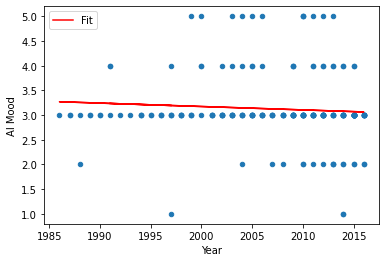

In [290]:
# This function samples the dataset so that our graph isn't just full of datapoints to the point of being unreadable
sampled_dataset = dataset.sample(200)

# Numpy comes with a polyfit function that we will use for our graph
pfit = np.polyfit(sampled_dataset['Year'], sampled_dataset['AI Mood'], 1)
func = np.poly1d(pfit)

sampled_dataset.insert(21, "Fit", func(sampled_dataset["Year"]))

# Now we just plot the datapoints and the linear regression we just did
plt = sampled_dataset.plot.scatter(x = "Year", y = "AI Mood")
sampled_dataset.plot(x = "Year", y = "Fit", color = "Red", ax=plt)


As we can see, there is a slight trend downwards in the general opinion on AI, but it does remain slightly above three, which means it stays positive. However, there do also seem to be quite a lot of neutral articles that have been written, which may be polluting our data, so lets try only graphing articles that have either a positive or a negative view on AI (A.K.A. only articles with an AI Mood of 1, 2, 4 or 5).

In [291]:
temp_data = []

# Here we simply loop through and only add articles with moods not equaling three to our dataset.
for i in dataset.iterrows():
    mood = list(i)[1][2]
    
    if mood != 3:
        temp_data.append(list(i)[1])
    
#Then we convert it to a dataframe
test_dataset = pd.DataFrame(temp_data)

Now we will run the analysis again to see if we get a different result.

<AxesSubplot:xlabel='Year', ylabel='AI Mood'>

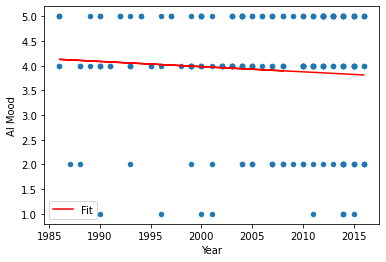

In [292]:
# This function samples the dataset so that our graph isn't just full of datapoints to the point of being unreadable
sampled_dataset = test_dataset.sample(200)

# Numpy comes with a polyfit function that we will use for our graph
pfit = np.polyfit(sampled_dataset['Year'], sampled_dataset['AI Mood'], 1)
func = np.poly1d(pfit)

sampled_dataset.insert(21, "Fit", func(sampled_dataset["Year"]))

# Now we just plot the datapoints and the linear regression we just did
plt = sampled_dataset.plot.scatter(x = "Year", y = "AI Mood")
sampled_dataset.plot(x = "Year", y = "Fit", color = "Red", ax=plt)

As we can see, if we remove all of the neutral articles, then the trend becomes a little bit more clear. Not only are articles generally positive around the 90's, but the trend downwards as we get closer to modern day is pronounced. 

Of course, linear regression is not the only method of analysis we can do, and one thing that we may notice in this graph is that it seems based on an eye test that there are more 1 and 2 level articles in 2005 and onwards compared to before, so even if the average hasn't decreased that much, perhaps there is more extreme negativity in general.

So, for the next graph we will graph the number of 1 Mood Articles per year, and the number of 1 Mood Articles per year in an attempt to see if, despite growing optimism about AI, there is also more fear.

<AxesSubplot:title={'center':'Positive Articles per Year'}, xlabel='Year', ylabel='Number of Very Positive Articles'>

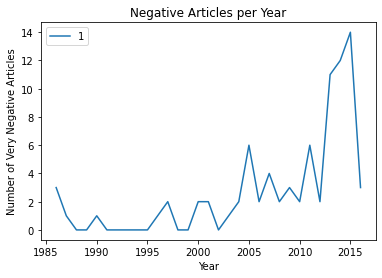

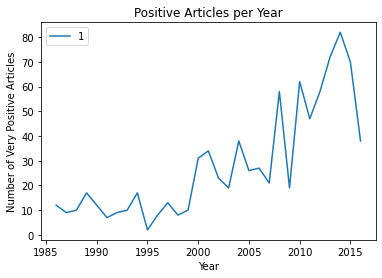

In [293]:
# Here we create arrays to store the number of ones and fives each year
num_of_ones = np.zeros(31)
num_of_fives = np.zeros(31)

# Now we will loop through the dataset and count up the number of ones and fives
for i in dataset.iterrows():
    mood = list(i)[1][2]
    
    # Here we subtract 1986 from the list since the first year is 1986, meaning that the year 1986 maps to the index of
    # 0 in our temporary arrays
    if mood == 1:
        num_of_ones[list(i)[1][21] - 1986] = num_of_ones[list(i)[1][21] - 1986] + 1
    elif mood == 5:
        num_of_fives[list(i)[1][21] - 1986] = num_of_fives[list(i)[1][21] - 1986] + 1
        
new_dataframe_ones = []
new_dataframe_fives = []
y = 1986

# Now we convert our arrays to two dimensional arrays that have the year stored so taht our graphs are easier to understand
for i in num_of_ones:
    new_dataframe_ones.append([y, i])
    
    y += 1

y = 1986

for i in num_of_fives:
    new_dataframe_fives.append([y, i])
    
    y += 1

# And finally we graph our results
test_dataset_ones = pd.DataFrame(new_dataframe_ones)
test_dataset_ones.plot(x = 0, y = 1, xlabel = "Year", ylabel = "Number of Very Negative Articles", title = "Negative Articles per Year")

test_dataset_fives = pd.DataFrame(new_dataframe_fives)
test_dataset_fives.plot(x = 0, y = 1, xlabel = "Year", ylabel = "Number of Very Positive Articles", title = "Positive Articles per Year")

So as we can see, for both positive and negative articles, the number increased substantially, which is not surprising. However, one interesting phenomenon is how around the year 2000 is when the number of positive articles sharply increased, while only in the year 2005 did the number of negative articles increase. This fits the idea that with all of the positive hope about AI comes a delayed  sense of foreboding about its future. It seems like for a while, there is lots of talk about the positives, but it takes some time for people to realize the negatives of AI. Also something noteworthy is that, from 2012 to 2015, there was an extremely sharp increase in negative articles, much moreso than positive articles. This could mean that negativity is increasing at a much faster rate in recent years compared to positivity.

The next thing we would like to look at is to see how opinions on different issues regarding ai have changed over time. I described previously the categories of topics that were tested for in the articles, so we will start by graphing the number of articles in each of the eight categories per year.

To do this, since each article simply stores a 1 or a 0 to indicate that it includes the topic, we simply sum up the columns from the dataset.

<AxesSubplot:title={'center':'Articles on Work affected by AI'}, xlabel='Year'>

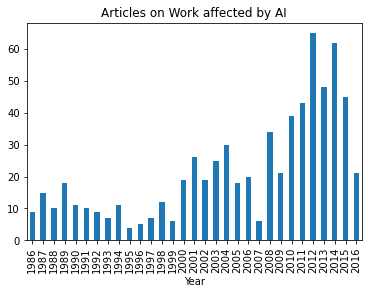

In [294]:
# First we group the data by year, and sum all the values up.
dataset_year = dataset.groupby(['Year']).sum()

# Then we  go through and store the newly summed up columns in a series of different arrays, one for each topic.
Cyborg = dataset_year["Cyborg (negative)"] + dataset_year["Cyborg (positive)"]
Ethics = dataset_year["Ethics (negative)"]
Military = dataset_year["Military (negative)"]
Education = dataset_year["Education (positive)"]
Entertain = dataset_year["Entertain (positive)"]
Healthcare = dataset_year["Healthcare (positive)"]
Singularity = dataset_year["Singularity (negative)"] + dataset_year["Singularity (positive)"]
Transportation = dataset_year["Transportation (positive)"]
Work = dataset_year["Work (negative)"] + dataset_year["Work (positive)"]

# Here we plot each of the topics we just summed up one by one so we can see their popularity year by year
Work.plot.bar(title = "Articles on Work affected by AI")

<AxesSubplot:title={'center':'Articles on Cyborg affected by AI'}, xlabel='Year'>

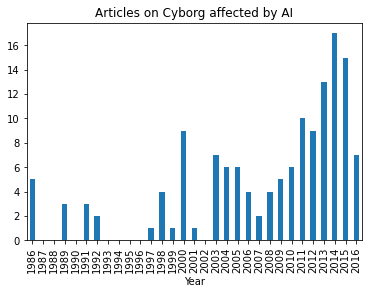

In [295]:
Cyborg.plot.bar(title = "Articles on Cyborg affected by AI")

<AxesSubplot:title={'center':'Articles on Ethics affected by AI'}, xlabel='Year'>

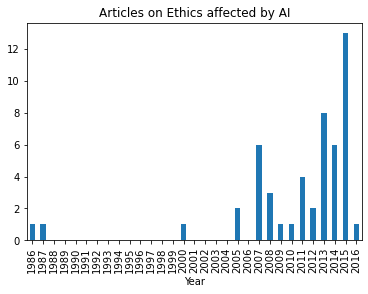

In [296]:
Ethics.plot.bar(title = "Articles on Ethics affected by AI")

<AxesSubplot:title={'center':'Articles on Military affected by AI'}, xlabel='Year'>

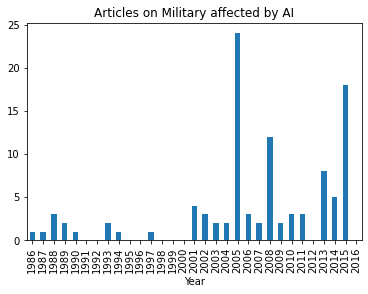

In [297]:
Military.plot.bar(title = "Articles on Military affected by AI")

<AxesSubplot:title={'center':'Articles on Education affected by AI'}, xlabel='Year'>

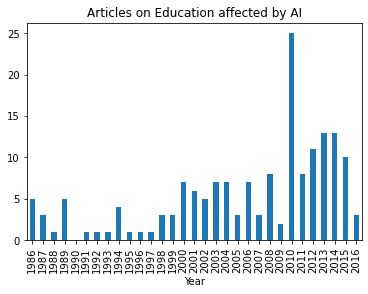

In [298]:
Education.plot.bar(title = "Articles on Education affected by AI")

<AxesSubplot:title={'center':'Articles on Entertain affected by AI'}, xlabel='Year'>

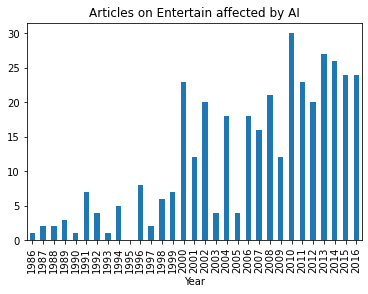

In [299]:
Entertain.plot.bar(title = "Articles on Entertain affected by AI")

<AxesSubplot:title={'center':'Articles on Healthcare affected by AI'}, xlabel='Year'>

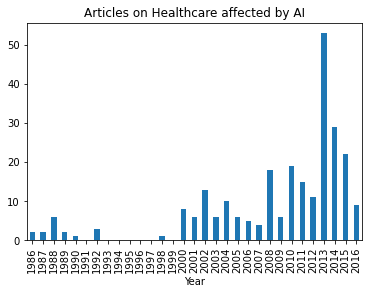

In [300]:
Healthcare.plot.bar(title = "Articles on Healthcare affected by AI")

<AxesSubplot:title={'center':'Articles on Singularity affected by AI'}, xlabel='Year'>

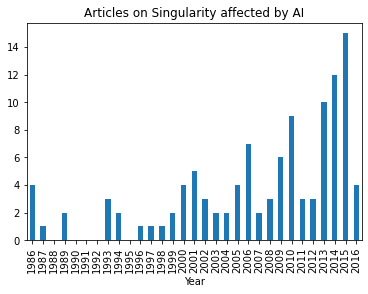

In [301]:
Singularity.plot.bar(title = "Articles on Singularity affected by AI")

<AxesSubplot:title={'center':'Articles on Transportation affected by AI'}, xlabel='Year'>

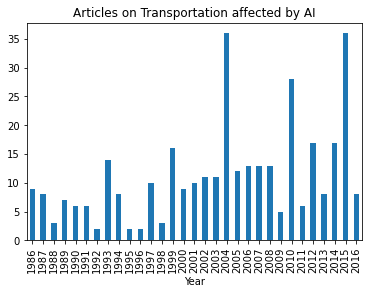

In [302]:
Transportation.plot.bar(title = "Articles on Transportation affected by AI")

By looking at these graphs, we can see that nearly every single topic has had an increase. The only exception seems to be transportation, which has some big peaks but on average looks to only be slightly increasing. Some interesting things are revealed by looking at these graphs. For example, ethics in AI was essentially not talked about at all until 2007 or so, meaning that it was never really considered until recently. Fears of AI use in the military seemed to peak around 2005 but has actually dropped a little since then. Healthcare is another sector that seemingly wasn't really considered much at all until around 2000. What is perhaps not much of a surprise is how the effect on AI on work is the most popular topic, and its not a wonder why. Many of the other issues are a lot more abstract and, for the most part, can be far away from the average person. However, someone's livelihood is much closer to home, and the increasingly generalized problem solving capabilities of AI are leading more and more people to a very grounded and easy to understand fear, "Will my job become automated?" It's no wonder its the most popular topic.

# Hypothesis testing and Machine Learning

One thing that I am more intimately curious about is which fears are increasing the fastest. It is easy to see that topics regarding AI are getting more prominent in the public eye, but which fears, exactly, do people worry about the most? If we were to project into the future, what issues are increasing the most relative to all the others? Another interesting piece of information is to see if any fears are strongly correlated. For example, I would hypothesize that Articles on the Singularity will have a strong correlation with Articles about work being affected by AI, since the singularity strongly implies almost any job being automated.

To do this, we will start by using some basic regression analysis just to see which Categories of interest are increasing the most rapidly. We will be excluding the year 2016 in these algorithms, because it seems that there is a dip at 2016 due to the dataset being taken during 2016, meaning that there are only a partial year of articles. This leads to an artificial dip in the number of articles for all categories in 2016, so we will remove this year to assist the algorithms.

We will start by analyzing the number of articles related to each topic per year, so we start be creating a dataframe that stores all of the info we just graphed.

In [303]:
# Here we go through and create a new analysis dataset that combines all of the data we just graphed into one dataset
analysis_dataset = pd.DataFrame(Cyborg)
analysis_dataset.columns = ["Cyborg"]

# Here we go through and add the columns one by one for each topic
analysis_dataset["Ethics"] = Ethics
analysis_dataset["Military"] = Military
analysis_dataset["Education"] = Education
analysis_dataset["Entertain"] = Entertain
analysis_dataset["Healthcare"] = Healthcare
analysis_dataset["Singularity"] = Singularity
analysis_dataset["Transportation"] = Transportation
analysis_dataset["Work"] = Work 

# Here we group the data by year, but calculate the mean AI Mood, which is much more useful than the sum of AI Mood in all
# Articles for that year
dataset_year = dataset.groupby(['Year']).mean()
Mood = dataset_year["AI Mood"]

analysis_dataset["AI Mood"] = Mood

# Here we drop the last row, which has the year 2016 which is incomplete
analysis_dataset = analysis_dataset.drop(analysis_dataset.index[-1])

Now we will do a polynomial regression for each topic, and then see what the derivative of each topic is at the year 2015, so we can see which topics are on the rise and which are getting less popular.

In [304]:
derivatives = []

topics = ["Cyborg", "Ethics", "Military", "Education", "Entertain", "Healthcare", "Singularity", "Transportation", "Work"]

# Here we just go through the topics one by one, doing a polynomial regression for each one and printing its derivative at
# 2015 to see the general trend in each topic
for i in topics:
    temp_coeff = np.polyfit(list(analysis_dataset.index), analysis_dataset[i], 3)
    temp_func = np.poly1d(temp_coeff)
    temp_deriv = temp_func.deriv()
    print("Derivative of " + i + " at 2015: " + str(temp_deriv(2015)))
    
    # Here we append the derivative to an array, which we will use later for normalizing the data
    derivatives.append(temp_deriv(2015))

Derivative of Cyborg at 2015: 1.82200264880521
Derivative of Ethics at 2015: 1.5518092325655743
Derivative of Military at 2015: 0.48369416190598713
Derivative of Education at 2015: 0.3450254811941704
Derivative of Entertain at 2015: 0.9485430306431226
Derivative of Healthcare at 2015: 3.515033962961752
Derivative of Singularity at 2015: 1.4373038214362168
Derivative of Transportation at 2015: 0.904594666000321
Derivative of Work at 2015: 4.884076560500034


Now we will normalize these derivatives based on the average of the derivatives to account for the fact that discussions around AI are increasing in general. Then, we can get a z-score to see how much certain derivatives stand out. If you are not familiar with z-score's and why they are useful, the wikipedia article is very useful here: https://en.wikipedia.org/wiki/Standard_score
(Note: z-score and Standard score are the same concept, although the semantics of the terms can get a little finicky)

In [305]:
mean = np.mean(derivatives)
sd = np.std(derivatives)

# Here we simply do the z-score calculation
derivatives = derivatives - mean * np.ones(9)
derivatives = derivatives / sd * np.ones(9)

# Here we simply print all of our new z-scores
print("z-score of Derivative of Cyborg at 2015: " + str(derivatives[0]))
print("z-score of Derivative of Ethics at 2015: " + str(derivatives[1]))
print("z-score of Derivative of Military at 2015: " + str(derivatives[2]))
print("z-score of Derivative of Education at 2015: " + str(derivatives[3]))
print("z-score of Derivative of Entertain at 2015: " + str(derivatives[4]))
print("z-score of Derivative of Healthcare at 2015: " + str(derivatives[5]))
print("z-score of Derivative of Singularity at 2015: " + str(derivatives[6]))
print("z-score of Derivative of Transportation  at 2015: " + str(derivatives[7]))
print("z-score of Derivative of Work at 2015: " + str(derivatives[8]))

z-score of Derivative of Cyborg at 2015: 0.039736838875075745
z-score of Derivative of Ethics at 2015: -0.15125347228997116
z-score of Derivative of Military at 2015: -0.9062667977235657
z-score of Derivative of Education at 2015: -1.0042868562675065
z-score of Derivative of Entertain at 2015: -0.577681329874546
z-score of Derivative of Healthcare at 2015: 1.2364816818957645
z-score of Derivative of Singularity at 2015: -0.2321933575249302
z-score of Derivative of Transportation  at 2015: -0.6087468974784555
z-score of Derivative of Work at 2015: 2.2042101903881344


So as we can see, one topic clearly stands out as statistically significant, Work. If we say that we want a standard deviation of 2 from the mean to consider a piece of data an outlier, then Work fits the bill. It's increase in articles per year has a z-score of 2.2042, which is a large outlier from all of the other data. This strongly implies that the increase in articles related to work is not due to chance, and is likely a real phenomenon, which in retrospect may be unsurprising. In a capitalistic society if you can't work then you can't survive, so people would naturally be worried about AI taking their jobs, even moreso with all the recent advancements in AI. There were a couple of other topics that were almost significant. Healthcare has a large increase, and Military and Education had a pretty large decrease. However, these z-scores were much closer to 0, and therefore it is harder to say they are significant.

Next, we will do some machine learning to figure out which topics predict a good or bad AI Mood.
To do this, I will be using k-Nearest Neighbors classification, where we will use the presence of certain topics in articles to try to predict whether the AI Mood will be 1, 2, 3, 4 or 5.

We will start by creating an array called X which stores all of our features (AKA whether or not an article contains each of the previously indicated topics), and y which stores the AI Mood for each article.

In [306]:
# Here are the two arrays which will store all of our data for training. X stores the "inputs", y stores the "outputs" AKA 
# the AI Mood
X = []
y = []

# Here we define an array for each topic
Cyborg = dataset["Cyborg (negative)"] + dataset["Cyborg (positive)"]
Ethics = dataset["Ethics (negative)"]
Military = dataset["Military (negative)"]
Education = dataset["Education (positive)"]
Entertain = dataset["Entertain (positive)"]
Healthcare = dataset["Healthcare (positive)"]
Singularity = dataset["Singularity (negative)"] + dataset["Singularity (positive)"]
Transportation = dataset["Transportation (positive)"]
Work = dataset["Work (negative)"] + dataset["Work (positive)"]
Mood = dataset["AI Mood"]

# Here we go through and populate X and y with all of the data from the topic arrays we just created
for i in range(0, len(Cyborg)):
    if i in Cyborg.index:
        X.append([Cyborg[i], Ethics[i], Military[i], Education[i], Entertain[i] , Healthcare[i], Singularity[i], Transportation[i], Work[i]])
        y.append(Mood[i])

Now we do the actual k-NN learning. We will be using SKLearn, which is a great python package for learning algorithms. SKLearn contains many different prebuilt machine learning methods that are quite easy to slot in. If you are interested in what other methods could be used here, see the documentation: https://scikit-learn.org/stable/modules/classes.html
First we will split our data into testing data and training data using some built in functions. To determine what our hyperparameters should be, we will test multiple different values for the number of neighbors.
We start by splitting our data into training data and testing data. If you are curious as to why we do this, there is a good write up here from google: https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data

As a basic summary though, we do this to make sure we are accurately measuring the success rate of our algorithm, because if we train and test on the same data, our algorithm might be very accurate on training data, but not generalize at all to other data.

In [307]:
# This function randomly breaks the training data into training data and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

for i in range(1,17):
    k_nearest_neighbors = DecisionTreeClassifier(max_depth  = i)

    k_nearest_neighbors.fit(X_train, y_train)

    print("Here is the score for our k nearest neighbors with " + str(i) + " neighbors:")
    print(k_nearest_neighbors.score(X_test, y_test))

Here is the score for our k nearest neighbors with 1 neighbors:
0.7564674397859055
Here is the score for our k nearest neighbors with 2 neighbors:
0.7618198037466548
Here is the score for our k nearest neighbors with 3 neighbors:
0.7546833184656556
Here is the score for our k nearest neighbors with 4 neighbors:
0.7609277430865299
Here is the score for our k nearest neighbors with 5 neighbors:
0.7618198037466548
Here is the score for our k nearest neighbors with 6 neighbors:
0.7627118644067796
Here is the score for our k nearest neighbors with 7 neighbors:
0.7627118644067796
Here is the score for our k nearest neighbors with 8 neighbors:
0.7636039250669046
Here is the score for our k nearest neighbors with 9 neighbors:
0.7636039250669046
Here is the score for our k nearest neighbors with 10 neighbors:
0.7644959857270295
Here is the score for our k nearest neighbors with 11 neighbors:
0.7644959857270295
Here is the score for our k nearest neighbors with 12 neighbors:
0.7644959857270295
H

If you are interested, there are some more values that could be tweaked in the k-NN model provided by sklearn. The documentation describes them here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

One thing that is worth checking is seeing if there is one AI Mood category that is dominating the entire dataset, so lets calculate what proportion of the dataset are 1's, 2's, 3's, 4's and 5's.

In [308]:
total = 0
moods = [0, 0, 0, 0, 0]

# Here we just sum up the number of articles of each mood
for i in Mood:
    total += 1
    moods[i-1] += 1
    
print("Proportion of Moods that are 1: " + str(moods[0] / total))
print("Proportion of Moods that are 2: " + str(moods[1] / total))
print("Proportion of Moods that are 3: " + str(moods[2] / total))
print("Proportion of Moods that are 4: " + str(moods[3] / total))
print("Proportion of Moods that are 5: " + str(moods[4] / total))

Proportion of Moods that are 1: 0.008997147245995173
Proportion of Moods that are 2: 0.048935703313583497
Proportion of Moods that are 3: 0.7259161729207813
Proportion of Moods that are 4: 0.12080315997366689
Proportion of Moods that are 5: 0.09534781654597323


As we can see, there is a somewhat dominant strategy for a potential Machine Learning Algorithm to simply choose 3 as the AI Mood for every single article, which would give it an accuracy of around 72.6%. If we look at our k-NN classifier, it has an accuracy of around 76.4%, which means it is not simply using that dominant strategy, which is good. However, our accuracy still isn't very good. Why is this? One possibility is that our dataset simply isn't great for this kind of machine learning analysis. If we look at the dataset there are many articles that only have a single topic as a one, with all other topics being a 0. In fact, there are some articles that have a 0 for everything. We also, of course, have an overabundance of 3's in our model, which may also be hurting our algorithm, because the dataset doesn't have enough diversity. However, the fact that our accuracy is above the dominant strategy means that our algorithm is learning somewhat.

# Insights

After all of that, what exactly can we take away from the data that we analyzed? First off, perhaps the most noteworthy conclusion is that the general feeling about AI is getting more and more negative as time passes. Is this just due to the public having a broader understanding about the reality of AI, or is it indicative of how AI will become more and more feared? It's impossible to say, but what we can show is that the trend is towards a negative opinion. This is important to realize, because this sort of trend is exactly how progress in AI can be hampered, how technology can be demonized, and how reactionary groups can start to spring up. The most famous example of something like this might be the anti-vax crowd. Of course, whether anti-AI ideologies would ever get that extreme, and ever more importantly, whether or not they would we unwarranted, is still unknown. However, it is something important to take into consideration.

Another big takeaway is the fact that the biggest growing fear regarding AI is how AI is going to affect work. We live in a society which is based around getting value from society by giving value to society. If someone loses their job, there are social nets to help them out, but not indefinitely. If there are not enough jobs to go around, jobless people won't be able to survive. In a world where AI might start to take away people's jobs, where even complex tasks like research might be automated, what will happen when there are literally no jobs left for people to do? With the way our society currently works, wealth would likely be amassed by those who created these AI, and people left jobless would starve. The growing fears around AI's automating our jobs are not just indicative of the clearest way AI will affect the average person, but it is indicative of a general philosophy in our society. If AI reaches a point where our productivity as a species can remain the same, or even increase exponentially, without most people having to work, then why do those jobless people need to starve? How will our society be set up in a world like that? The entire system would have to change. This is something that is really important, because the way our society is structured, AI would not bring in a utopia, it would bring in a dystopia where no one can work, and no one can survive despite the necessary productivity being fulfilled by AI.

These questions surrounding AI and its future have been a big talking point of recent years, and so doing analysis like this can be really useful in unfurling the mystery somewhat on where we are trending towards. Of course, not every answer reveals itself, and in fact we still are unsure about most of the questions we would like to know. However, at the end of it all, we do come out knowing a little more about the publics opinion than we knew going in.